# Understanding seattle Airbnb Data 
Airbnb has been around for more than 10 year and made it easier for people to book rooms on an apartment or houses for certain period of time. This rooms are usually cheaper than the hotel and have some ameneties provided by the host to make their stay comfortable.In this project, I have used Seattle airbnb data to make some prediction. CRISP-DM(Cross-Industry Standard Process for Data Mining) will be conducted to understand the problem and perform data analysis.
- CRISP-DM:<br>
    - Business Understanding <br>
    - Data Understanding <br>
    - Data Preparation <br>
    - Data Modeling <br>
    - Evaluation <br>
    - Deployment <br>

## 1. Business Understanding
1) Investigate the index affecting the prices <br>
2) Sentiment analysis of the reviews <br>
3) Investigate the popular times of the year for the seattle Airbnb<br>

## 2. Data Understanding
### 2.1 Explore the Data
 We will run the code below to import or load all the necessary Python libraries and load the listing, review and calander data from the Seattle Airbnb. 

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [230]:
# Read the listing data set
listing=pd.read_csv('./seattle/listings.csv')

In [231]:
listing.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [232]:
# Lets look at the listing data set columns
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [233]:
# Create a neighbourhood dataframe to count the number of listing for each neighbourhood
neighbourhood=listing['neighbourhood_cleansed'].value_counts().reset_index()
neighbourhood

,index,neighbourhood_cleansed
0,Broadway,397
1,Belltown,234
2,Wallingford,167
3,Fremont,158
4,Minor,135
...,...,...
82,Arbor Heights,5
83,South Beacon Hill,4
84,Pinehurst,4
85,South Park,3


In [234]:
#Check the Columns with null values
listing.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [235]:
listing['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

## 3.  Data Preparation

We will use some features from the listing to see the effect of index on the pricing. A lot of features have been excluded and inclusion of all the feature for the price prediction can be a future project. Let's explore the listing data and get some insight.

In [175]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [176]:
listing[['accommodates', 'bedrooms','extra_people']].isnull().sum()

accommodates    0
bedrooms        6
extra_people    0
dtype: int64

Lets create a function to convert the extra few people column to a binary value.

In [177]:
# Will return 0 if the values are $0.00 and will return 1 for all the other case.
def get_extra_people_fee(row):
    if row['extra_people'] == '$0.00':
        return 0.0
    else:
        return 1.0

We will create a function to clean the listing data. All of these were done separately in a different notebook and making a function to clean the data shows cleanliness in the code. All the process involved will be explained line by line.

In [178]:
def clean_data(df):
  
    # Replace the '$' and ',' with ' ' and convert the price to float.
    df['price']=df['price'].str.replace('$','')
    df['price']=df['price'].str.replace(',','').astype("float")
    df=df.dropna(subset=['price'],axis=0)
    y=df['price']
    # Select the features that we will use for training.
    X = df[['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bedrooms','extra_people']]
    # Use the get_extra_people_fee function to convert that column into binary.
    X['extra_few_people_fee']=X.apply(lambda row: get_extra_people_fee(row),axis=1)
    X=X.drop(columns=['extra_people'])
    # Fill NA with mean for the numerical values.
    num_vars=X.select_dtypes(include=['int','float']).columns
    for num in num_vars:
        X[num].fillna(X[num].mean(),inplace=True)
    # Use get_dummies to fill NA for the categorial or object.    
    cat_vars=X.select_dtypes(include=['object']).copy().columns
    for col in cat_vars:
        X=pd.concat([X.drop(col,axis=1),pd.get_dummies(X[col],drop_first=True)],axis=1)
    
    return X,y

In [179]:
X,y=clean_data(listing)

/Users/sunilthapa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [180]:
X.head()

,accommodates,bedrooms,extra_few_people_fee,Alki,Arbor Heights,Atlantic,Belltown,Bitter Lake,Briarcliff,Brighton,...,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Private room,Shared room
0,4,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,5.0,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.0,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Here, the categorical varialbe such as neighbourhood_cleansed,property_type,room_type has been handeled using pd.get_dummies(). This creates a duplicate variable which creates one level and presence of level is represented by 1 and absence is represented by 0.Also, the missing numerical values has been filled with mean.Since there are few missing values a choice mean is suitable. This does not have any effect on the variance of the data for low number of missing values.

In [144]:
# Load the review dataset
reviews=pd.read_csv('./seattle/reviews.csv')

In [145]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [146]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [147]:
# We will drop the comments with null from the review dataframe
reviews=reviews.dropna(subset=['comments'],axis=0)

Here, the missing value has been dropped as there are few missing values.

In [148]:
def get_review_scores(listing_id):
    review_score=listing.loc[listing['id']==listing_id,'review_scores_value'].iloc[0]
    return review_score



In [149]:
reviews['review_score']=reviews['listing_id'].apply(get_review_scores)

In [150]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_score
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,10.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,10.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",10.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,10.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,10.0


In [159]:
reviews.describe()

,listing_id,id,reviewer_id,review_score
count,8.483100e+04,8.483100e+04,8.483100e+04,84799.000000
mean,3.005270e+06,3.058980e+07,1.701347e+07,9.501492
std,2.472827e+06,1.636519e+07,1.353705e+07,0.567561
min,4.291000e+03,3.721000e+03,1.500000e+01,2.000000
25%,7.946330e+05,1.725821e+07,5.053141e+06,9.000000
50%,2.488228e+06,3.228949e+07,1.413622e+07,10.000000
75%,4.694479e+06,4.457748e+07,2.762404e+07,10.000000
max,1.024814e+07,5.873651e+07,5.281274e+07,10.000000


In [160]:
# We will use just the comments and the review_score for the training purpose.
df=reviews[['comments','review_score']]

In [162]:
reviews['review_score'].isnull().sum()

32

In [236]:
# Load the calander dataset
df_calendar=pd.read_csv('./seattle/calendar.csv')

In [237]:
# Replace the '$' and ',' with '' and convert the price to float in the calandar dataframe
df_calendar['price']=df_calendar['price'].str.replace('$','')
df_calendar['price']=df_calendar['price'].str.replace(',','').astype('float64')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# 4 Data Modeling
## 4.1) Investigate the index affecting the prices <br>

In [181]:
# We will use train test_split to split the data into X_train, X_test, y_train,y_test for the listing data set.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state = 42)


In [182]:
# A standardscaling has been used
scaler_price=StandardScaler()

In [183]:
X_train_scaled=scaler_price.fit_transform(X_train)
X_test_scaled=scaler_price.fit_transform(X_test)

In [184]:
# Instantiate the linearRegression model and fit the training data set 
model=LinearRegression(normalize=True)
model.fit(X_train_scaled,y_train)
# Predict and use r2 score on both the training data and testing data.
y_test_preds=model.predict(X_test_scaled)
y_train_preds=model.predict(X_train_scaled)
print("The r2 score on training data is {}.".format(r2_score(y_train,y_train_preds)))
print("The r2 score on testing data is {}.".format(r2_score(y_test,y_test_preds)))

The r2 score on training data is 0.5667527387694488.
The r2 score on testing data is 0.572964410121223.


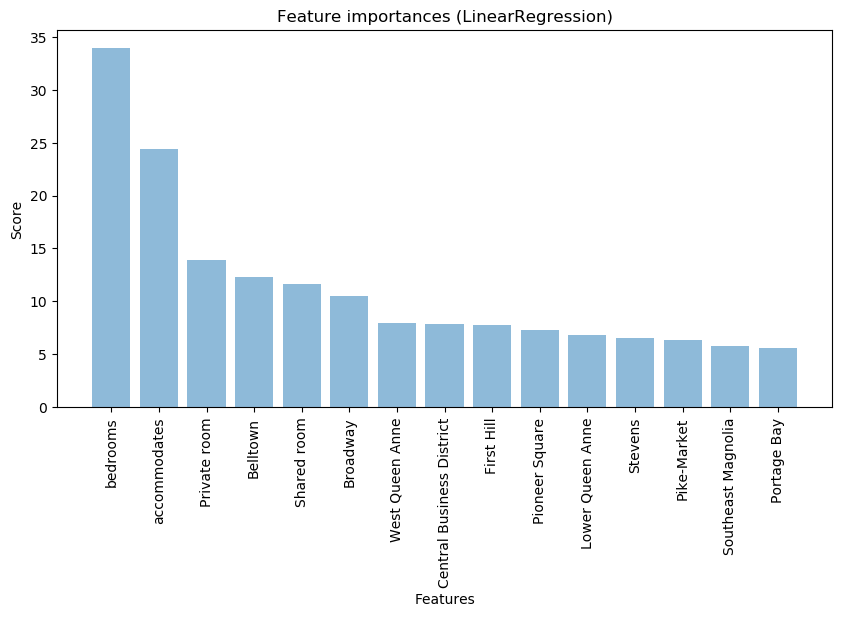

In [185]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, np.abs(model.coef_)), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)
feature_importances = feature_importances.sort_values(by = ['score'], ascending = False)

features = feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5),dpi=100)
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (LinearRegression)')
 
plt.show()

In [186]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = model.coef_
    coefs_df['abs_coefs'] = np.abs(model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
1,bedrooms,33.943628,33.943628
0,accommodates,24.364061,24.364061
104,Private room,-13.945136,13.945136
6,Belltown,12.353519,12.353519
105,Shared room,-11.663647,11.663647
11,Broadway,10.502287,10.502287
83,West Queen Anne,7.970315,7.970315
14,Central Business District,7.892745,7.892745
22,First Hill,7.737099,7.737099
62,Pioneer Square,7.307622,7.307622


If we look at the r2 score for both the training and testing data we can see a comarable score of 0.56 and 0.57. This score can be improved if we include more features in the training data set.Now, lets move onto the coefficient analysis. The feature that affects the pricing are number of bedrooms, number of accomadation, avialiblity of private rooms and neighborhood. 

## 4.2) Sentiment analysis of the reviews <br>

We will convert the review score to binary for the review data set. This will make it easier for the model that we will be using. 
    

In [187]:
# Drop the null values in the dataset  as there are few missing values.
df=df.dropna(subset=['review_score'],axis=0)
# Will only take the review_score which does not include 6. This has been done to take the values greater 
# than 6 as 1 and values lower than 6 as 0.
df=df[df.review_score!=6]
df['binary_class']=np.where(df['review_score']>6,1,0)
X=df['comments']
y=df['binary_class']

In [188]:
df.sample(5)

,comments,review_score,binary_class
69486,"Cheerful, easygoing, hospitality was the hallm...",10.0,1
6513,As our first time using airbnb and going to Se...,10.0,1
49033,Great location with easy access to public tran...,8.0,1
52107,"I stayed four weeks, and while sharing space w...",10.0,1
51343,Kathleen was very welcoming and she sent lovel...,10.0,1


In [189]:
# Create train and test data sets
X_review_train,X_review_test,y_review_train,y_review_test=train_test_split(X,y,test_size=0.30,random_state=42)

We will turn words into numbers using the countvectorizer. For regression to use the features, we have to convert the words into numbers. This process is called "Bag-of-words" and the order of the words does not matter and bag of words counts the frequency per instance of words used.

In [190]:
# import the countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
# assign X_review train to numbers
vect=CountVectorizer().fit(X_review_train)
# create a matrix array for the logistic Regression
X_vectorized=vect.transform(X_review_train)

In [191]:
print(X_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [192]:
# Import the logistic Regression and roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [193]:
# Instantiat the model and fit and predict using the model 
model_log=LogisticRegression()
model_log.fit(X_vectorized,y_review_train)
prediction=model_log.predict(vect.transform(X_review_test))
print("The AUC score is {}.".format(roc_auc_score(y_review_test,prediction)))

/Users/sunilthapa/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The AUC score is 0.5.


We will use see which words had the highest impace on the class separation. We will translate the numbers back to words and get the coefficeint for each words and sort them by coefficeint.

In [194]:
# create an array for the all the words
feature_names=np.array(vect.get_feature_names())
# creat an array for the regression coefficent
coef_index=model_log.coef_[0]
# create a dataframe for word and coefficeint
df=pd.DataFrame({'Word':feature_names,'Coef':coef_index})
df.sort_values('Coef')

,Word,Coef
7542,day,-0.869002
15707,kevin,-0.750808
22853,recommendations,-0.736182
11614,full,-0.728243
4104,both,-0.704500
...,...,...
21197,place,0.540763
16887,location,0.583228
5772,clean,0.631527
12546,great,0.883514


### a) Negative Sentiment <br>
   - "Day" is the most negative correlated word. This must have came up as the room was availabe for one day.
   - "Kevin" a person name is also a negative word. This seems to be like a host name and this name must have came up in the comments many times which had lower review_score.
   - "both" is not something that can be associated with sentiment analysis. 
  
### b) Positive Sentiment <br>
   - "Days" as compared to "Day" means that have a range of days of availiblity had a high impact for higher score.
   - "great" is often associated with a great service or great host 
   - "clean" was something that was expected, as a clean room recieves a positve score.
   - "location" also means that the neighbourhood was good or the location was ideal.

## 4.3) Investigate the popular times of the year for the seattle Airbnb.<br>

In [207]:
df_calendar=df_calendar.dropna(subset=['price'],axis=0)

In [208]:
df_calendar['year']=pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month']=pd.DatetimeIndex(df_calendar['date']).month

In [209]:
df_calendar.tail()
df_calendar['price'].sum()/df_calendar.shape[0]

137.94485855103355

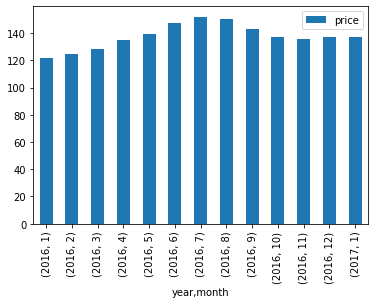

In [210]:
df_calendar.groupby(['year','month'])[['price']].mean().plot(kind='bar')

In [238]:
most_popular = df_calendar.copy()
most_popular.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [239]:
most_popular_clean = most_popular.drop(columns='price')

In [240]:
most_popular_clean = most_popular_clean[most_popular_clean['available']=='f']

In [241]:
most_popular_clean = most_popular_clean.groupby('date')['listing_id'].count()

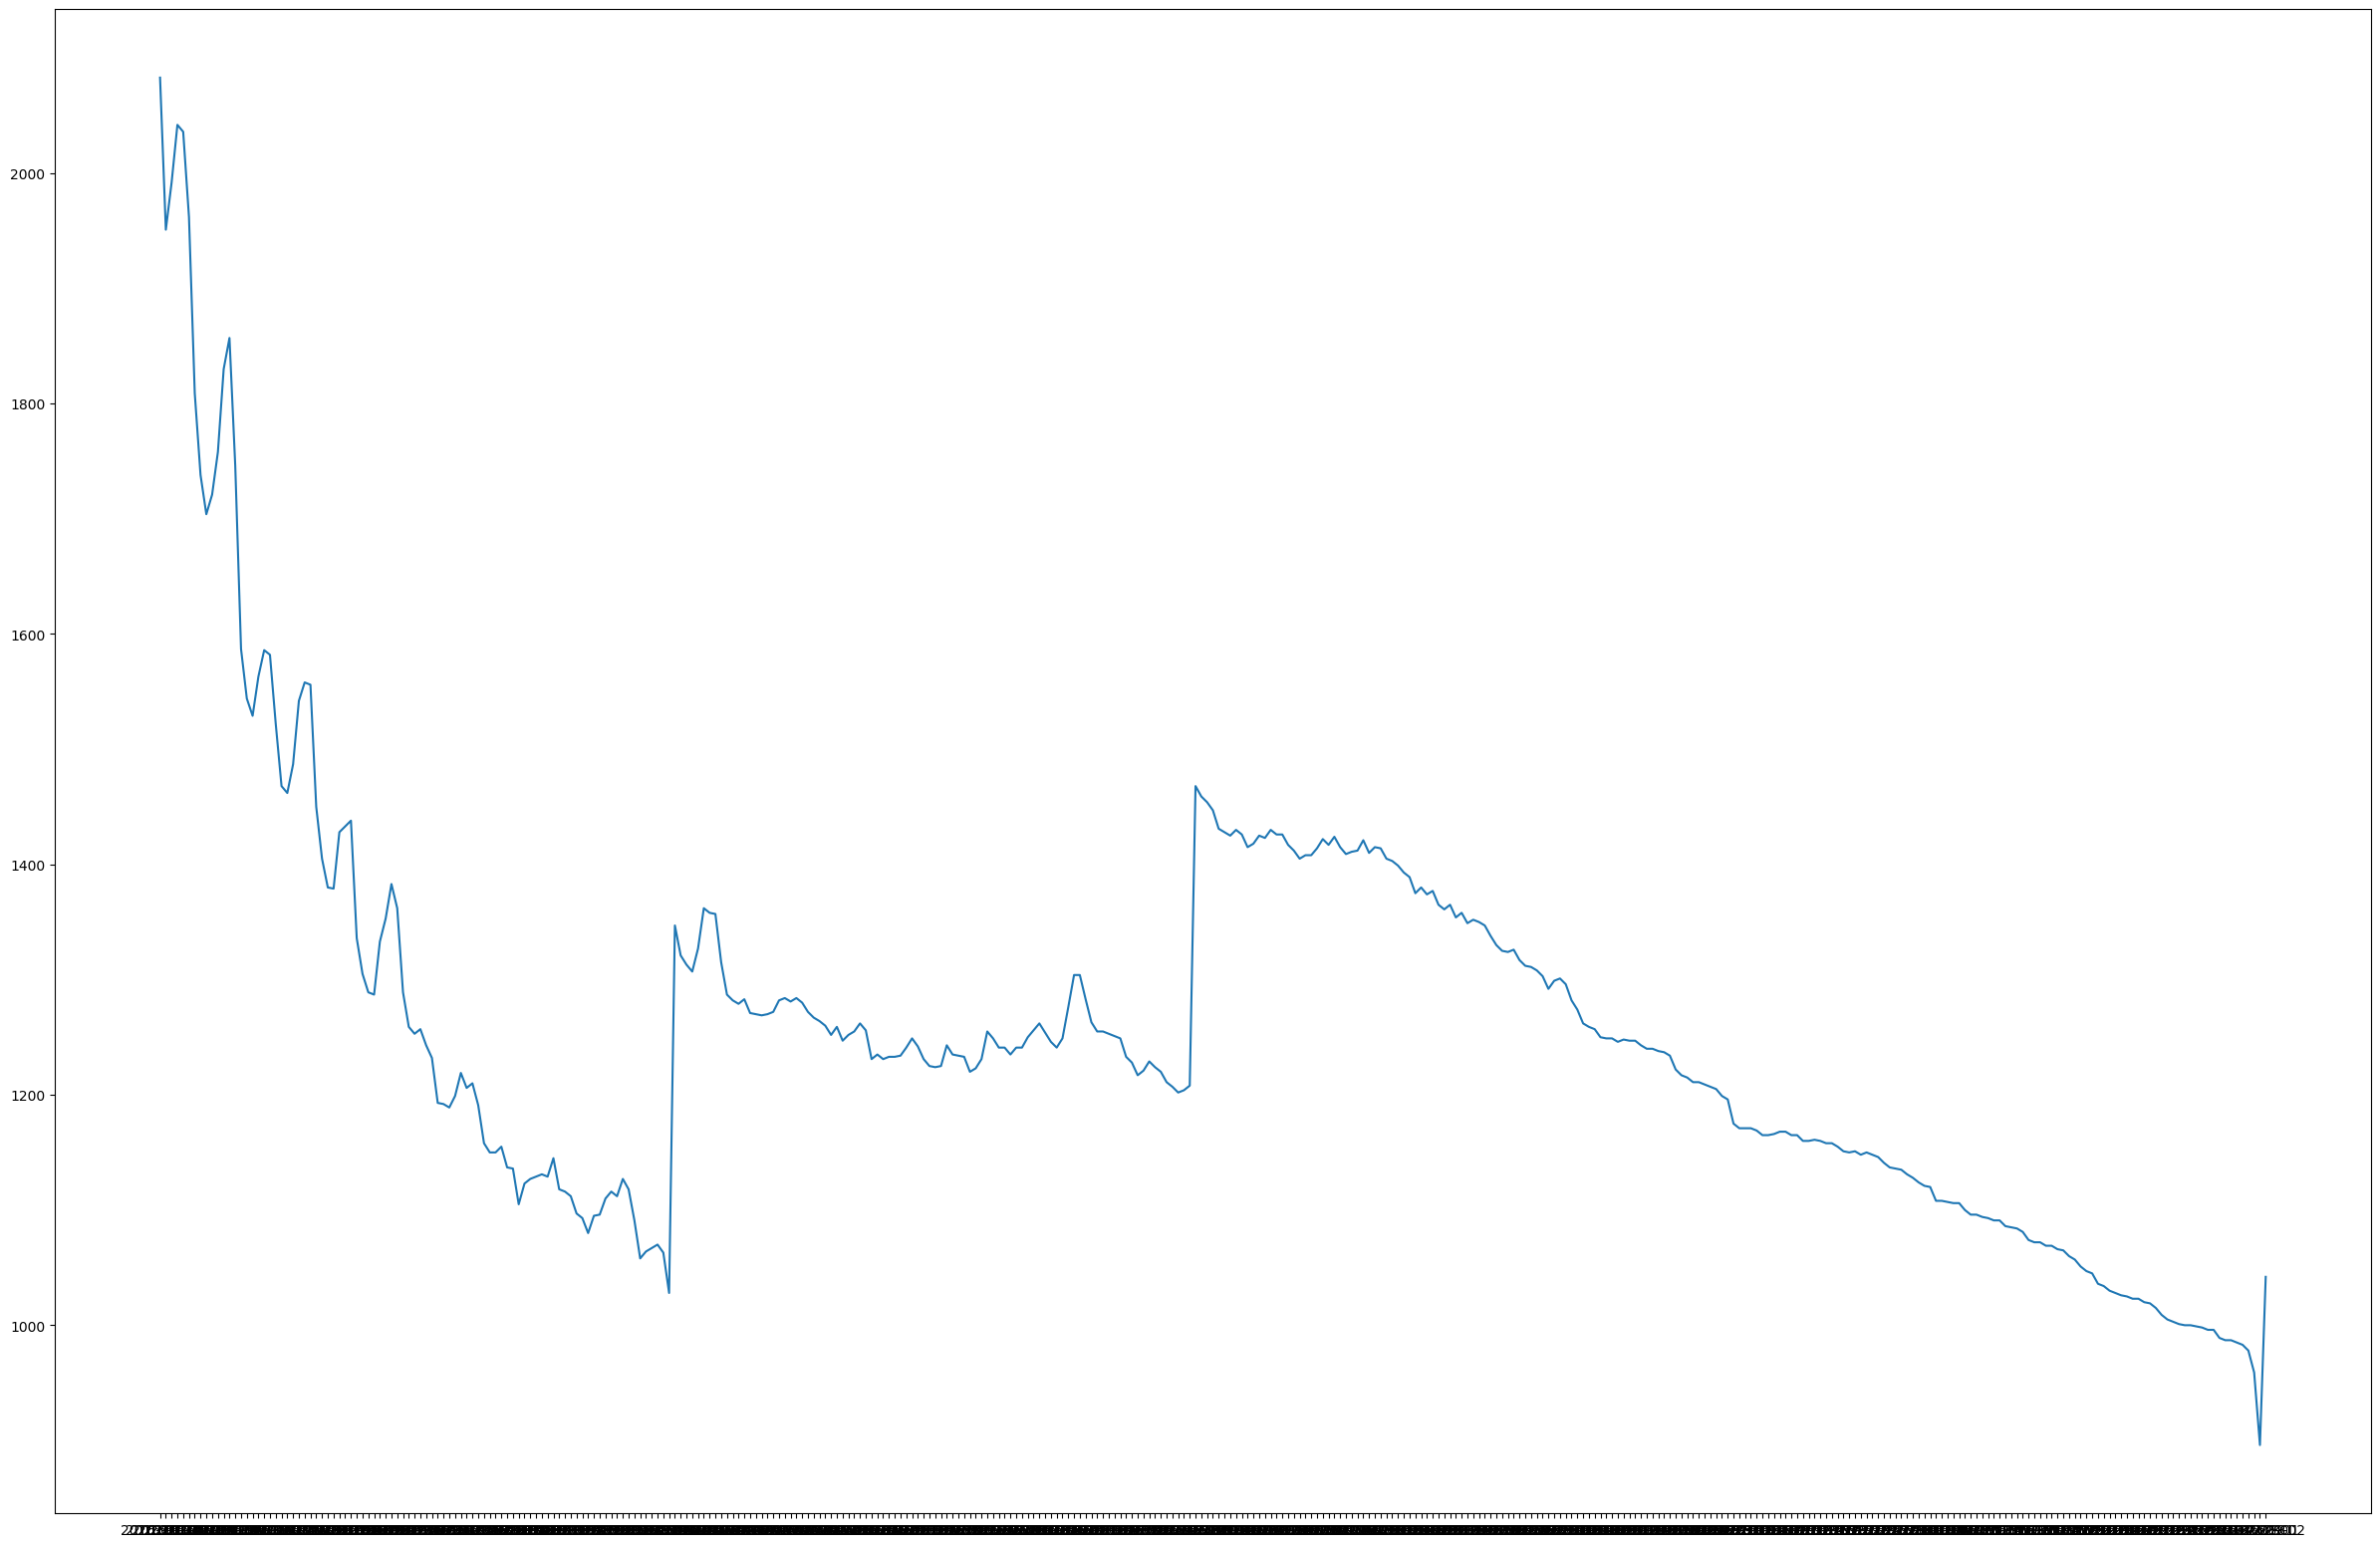

In [242]:
calendar_pop = pd.DataFrame({'date':most_popular_clean.index,'available listings':most_popular_clean.values})
plt.figure(figsize=[30,20],dpi=100)
plt.plot('date','available listings',data = calendar_pop)


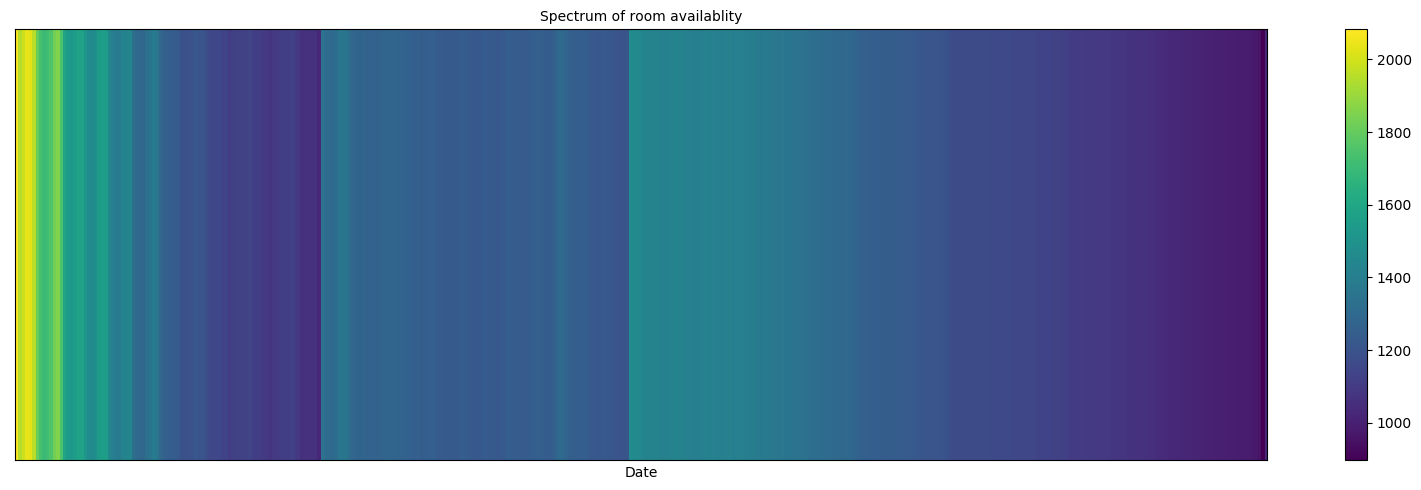

In [243]:
plt.figure(figsize=[16,5],dpi =100)
plt.title('Spectrum of room availablity',fontsize =10)
# Instead of using np.newaxis, np.reshape() can be used.
plt.imshow(calendar_pop['available listings'].values[np.newaxis,:],aspect="auto")
plt.yticks([])
plt.xticks([],calendar_pop['date'][0:1000:100])
plt.colorbar()
plt.xlabel('Date')
plt.tight_layout()



We can clearly see from the graph that the most popular times of the year is around january. The graph has spikes at certain months. This spikes can also be seen at the spectrum when the color line move from blue toward yellow or green. The color spectrum legend shows that yellow means most popular time of the year and it is clear that the first month of the year is most popular.